In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time
import seaborn as sns

In [2]:
df = pd.read_excel("C:/Users/user/Downloads/미니프로젝트-쇼핑몰 실습데이터.xlsx")

# RFM 분석에 필요한 용어
* RFM 분석: 아래의 세 요소를 따라 분류 및 평가하는 분석
    * : Recency 얼마나 최근에 구매했는가
    * : Frequency 얼마나 자주 구매했는가
    * : Monetary 얼마나 많이 지출했는가
* RFM 분석의 분류
    * 충성도(상기 요소를 종합적으로 고려)에 따른 분류
    * 구매 빈도에 따른 분류
    * 지출금액에 따른 분류
    * 이외에도 주관적으로 분류 기준 수립이 가능
    * 정해진 기준이 없어 자유롭게 분류 가능

# 분석 진행하기
 # <필수 분석>
 1. 사용자의 충성도 분류 (3그룹) 진행  
     a. 분류의 제한은 없으나 분류의 논리가 필요
     
 2. 수익을 정리해 시각화해보자  
     a. 월별, 연도별 매출  
     b. 월별 실제 수익 (처리상황, 할부기간 고려)  
     c. 월별 시각화에서 연도의 변화는 무시한다  
     
 3. 결제방법에 따른 결제금액 분석  
     a. 결제방법에 따른 결제금액에 유의미한 차이가 있는지 분석 후 시각화해보자  
     b. 결제방법이 여러 조합일 경우, 맨 앞의 한가지만 사용한 것으로 간주한다  
     
# <선택 분석>
1. 상품별 분석  
    a. 최대 매출 상품 3가지를 집계한다  
    b. 주문연도에 따라 해당 상품의 매출 증감을 통계적으로 확인한다  
2. 연관성 분석  
    a. 판다스의 corr() 함수 또는 다른 패키지의 유사 기능을 이용  
    b. 주문한 달과 판매금액의 상관관계가 있는지 확인하자  
    c. 단, 연도의 변화는 무시한다 

In [24]:
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


In [25]:
df1 = df.copy() # 문제 1번에 쓰이는 df

In [7]:
df2 = df.copy() # 문제 2번에 쓰이는 df

In [119]:
df3 = df.copy() # 문제 3번에 쓰이는 df

---
# 1번 문항

In [23]:
df['처리상태'].unique()
# (구매확정) 고객이랑 (주문취소, 미결제) 고객 나누어서 충성도 분류를 진행함.
# 두 그룹 사이에 물품 차이나 가격 차이, 결제 방식 차이등을 보기 위함.

array(['구매확정', '주문취소', '미결제', '후불반려', '환불완료', '환불승인', '부분환불', '부분취소',
       '상담취소', '교환완료', '상담형상품접수', '환불요청', '배송완료', '배송준비', '배송중', '시안확인요청',
       '결제완료'], dtype=object)

In [26]:
df1_buy = df1[df1['처리상태'] == '구매확정']

In [28]:
df1_notbuy = df1[(df1['처리상태'] == '주문취소') | (df1['처리상태'] == '미결제')]

In [30]:
df1_buy.duplicated(subset=['주문번호']).sum()

46188

In [31]:
df1_notbuy.duplicated(subset=['주문번호']).sum()
#주문번호 중복이 몇개있는지 확인함.

16346

In [33]:
def all_same(items):
    target = items.iloc[0]
    for i in items:
        if target != i:
            return False
    return True

def reduce_dataframe(target, key): #주문번호를 기준으로 중복된 데이터들을 리스트로 합쳐주는 함수
    data = []
    
    unique_keys = target[key].unique()
    columns = target.columns
    columns = columns.delete(columns.get_loc(key))
    
    for fcd in unique_keys:
        part = target[(target[key] == fcd)]
        part = part.fillna('')
        if part.empty: continue
        item = {key: fcd}
        for column in columns:
            if all_same(part[column]): # 상단의 all_same 함수가 쓰임.
                item[column] = part[column].iloc[0]
            else:
                item[column] = part[column].to_list()
        data.append(item)
    return pd.DataFrame(data)

In [34]:
new_df1_buy = reduce_dataframe(df1_buy, "주문번호")
new_df1_notbuy = reduce_dataframe(df1_notbuy, "주문번호")

In [35]:
new_df1_buy

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,,
1,191216100347429,지니,"[eHBM셀파수학교실 비닐봉투-1세트 100장입, eHBM셀파수학교실 삼색볼펜-1세...",HB,"[1, 3]","[5000, 67500]",신용카드,2019-12-16 10:04:50,구매확정,N,,
2,191216173241622,지니,"[eHBM셀파수학교실 회원용 리플렛-1세트 50권입, eHBM셀파수학교실-학습계통도...",HB,"[2, 1, 1, 1, 1]","[30000, 750, 16000, 6000, 20000]",신용카드,2019-12-16 17:33:43,구매확정,N,,
3,191218153940815,지니,"[eHBM셀파수학교실 비닐봉투-1세트 100장입, eHBM셀파수학교실-창문스티커(원...",HB,1,"[5000, 3000, 4000]",신용카드,2019-12-18 15:40:44,구매확정,N,,
4,191218170839143,지니,"eHBM셀파수학교실 종이컵-1박스 1,000개입",HB,3,48000,신용카드,2019-12-18 17:09:42,구매확정,N,,
...,...,...,...,...,...,...,...,...,...,...,...,...
113098,221106231538662,다우기술,[올리브영] 기프트카드 1만원권,올리브영,2,19200,신용카드,2022-11-06 23:13:17,구매확정,N,,
113099,221107074704768,다우기술,[따뜻달달특가] 빽다방-빽′s카페라떼(HOT),빽다방,1,2550,신용카드,2022-11-07 07:44:43,구매확정,N,,
113100,221107081217959,다우기술,[GS25] 모바일 상품권 2천원권,GS25,1,1800,신 + 포,2022-11-07 08:09:57,구매확정,N,,
113101,221107083418760,다우기술,[이디야] 연유 카페라떼 HOT,이디야,1,3400,포인트,2022-11-07 08:31:57,구매확정,N,,


In [36]:
new_df1_notbuy

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191217142849520,쥬크박스,[학생선물] 전통탈,쥬크박스,1,900,가상계좌,2019-12-17 14:29:52,주문취소,N,,
1,191218131502518,지니,"HBE종이컵-1Box 1,000개입",HB,5,105000,신용카드,2019-12-18 13:16:06,미결제,N,,
2,191218133805345,지니,eHBM셀파수학교실-물티슈_1세트 100개입,HB,1,20000,신용카드,2019-12-18 13:39:09,미결제,N,,
3,191218174219998,지니,"[eHBM셀파수학교실-연필(빨강)_1세트 50개입, eHBM셀파수학교실-색연필(빨강...",HB,"[1, 2, 1, 3, 3]","[6000, 2000, 1000, 9000, 12000]",신용카드,2019-12-18 17:43:23,미결제,N,,
4,191218174317524,지니,"[eHBM셀파수학교실-연필(빨강)_1세트 50개입, eHBM셀파수학교실-색연필(빨강...",HB,"[1, 2, 1, 3, 3]","[6000, 2000, 1000, 9000, 12000]",신용카드,2019-12-18 17:44:21,미결제,N,,
...,...,...,...,...,...,...,...,...,...,...,...,...
39492,221108022050700,다우기술,[따뜻달달특가] 투썸플레이스-바닐라 카페라떼(R),투썸플레이스,10,44500,신용카드,2022-11-08 02:18:29,미결제,N,,
39493,221108040158843,천재태블릿,[UPGRADE 이벤트] 스마트 HBE 학습 전용 태블릿+거치대/헤드셋 증정-일반결제,삼성전자,2,792000,신용카드,2022-11-08 03:59:37,미결제,N,,
39494,221108050959864,지니,[한정판매] 셀파우등생-흔들이 핫팩 1Box 80개입,동성산업,1,29900,신용카드,2022-11-08 05:07:38,미결제,N,,
39495,221108075702708,쥬크박스,"[[학생선물] 2000 냥냥이 스퀴시 중성펜 0.5mm (랜덤발송), [학생선물] ...",,"[2, 1]","[3400, 2550]",신 + 포,2022-11-08 07:54:41,미결제,N,,


In [39]:
new_df1_buy.duplicated(subset=['주문번호']).sum()

0

In [40]:
new_df1_notbuy.duplicated(subset=['주문번호']).sum()
# 주문번호 중복이 0이므로 중복된 주문번호는 모두 합쳐짐.

0

In [42]:
new_df1_buy['판매금액'] = new_df1_buy['판매금액'].apply(lambda x: sum(x) if isinstance(x, list) else x)
new_df1_notbuy['판매금액'] = new_df1_notbuy['판매금액'].apply(lambda x: sum(x) if isinstance(x, list) else x)
# 리스트에 있는 판매금액을 합쳐줌
# list형과 int 형이 합쳐져 있기 때문에 isinstance 함수를 이용하여 list면 값을 합쳐주고 아니라면 x를 반환함.

In [43]:
new_df1_buy

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,,
1,191216100347429,지니,"[eHBM셀파수학교실 비닐봉투-1세트 100장입, eHBM셀파수학교실 삼색볼펜-1세...",HB,"[1, 3]",72500,신용카드,2019-12-16 10:04:50,구매확정,N,,
2,191216173241622,지니,"[eHBM셀파수학교실 회원용 리플렛-1세트 50권입, eHBM셀파수학교실-학습계통도...",HB,"[2, 1, 1, 1, 1]",72750,신용카드,2019-12-16 17:33:43,구매확정,N,,
3,191218153940815,지니,"[eHBM셀파수학교실 비닐봉투-1세트 100장입, eHBM셀파수학교실-창문스티커(원...",HB,1,12000,신용카드,2019-12-18 15:40:44,구매확정,N,,
4,191218170839143,지니,"eHBM셀파수학교실 종이컵-1박스 1,000개입",HB,3,48000,신용카드,2019-12-18 17:09:42,구매확정,N,,
...,...,...,...,...,...,...,...,...,...,...,...,...
113098,221106231538662,다우기술,[올리브영] 기프트카드 1만원권,올리브영,2,19200,신용카드,2022-11-06 23:13:17,구매확정,N,,
113099,221107074704768,다우기술,[따뜻달달특가] 빽다방-빽′s카페라떼(HOT),빽다방,1,2550,신용카드,2022-11-07 07:44:43,구매확정,N,,
113100,221107081217959,다우기술,[GS25] 모바일 상품권 2천원권,GS25,1,1800,신 + 포,2022-11-07 08:09:57,구매확정,N,,
113101,221107083418760,다우기술,[이디야] 연유 카페라떼 HOT,이디야,1,3400,포인트,2022-11-07 08:31:57,구매확정,N,,


In [44]:
new_df1_notbuy

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191217142849520,쥬크박스,[학생선물] 전통탈,쥬크박스,1,900,가상계좌,2019-12-17 14:29:52,주문취소,N,,
1,191218131502518,지니,"HBE종이컵-1Box 1,000개입",HB,5,105000,신용카드,2019-12-18 13:16:06,미결제,N,,
2,191218133805345,지니,eHBM셀파수학교실-물티슈_1세트 100개입,HB,1,20000,신용카드,2019-12-18 13:39:09,미결제,N,,
3,191218174219998,지니,"[eHBM셀파수학교실-연필(빨강)_1세트 50개입, eHBM셀파수학교실-색연필(빨강...",HB,"[1, 2, 1, 3, 3]",30000,신용카드,2019-12-18 17:43:23,미결제,N,,
4,191218174317524,지니,"[eHBM셀파수학교실-연필(빨강)_1세트 50개입, eHBM셀파수학교실-색연필(빨강...",HB,"[1, 2, 1, 3, 3]",30000,신용카드,2019-12-18 17:44:21,미결제,N,,
...,...,...,...,...,...,...,...,...,...,...,...,...
39492,221108022050700,다우기술,[따뜻달달특가] 투썸플레이스-바닐라 카페라떼(R),투썸플레이스,10,44500,신용카드,2022-11-08 02:18:29,미결제,N,,
39493,221108040158843,천재태블릿,[UPGRADE 이벤트] 스마트 HBE 학습 전용 태블릿+거치대/헤드셋 증정-일반결제,삼성전자,2,792000,신용카드,2022-11-08 03:59:37,미결제,N,,
39494,221108050959864,지니,[한정판매] 셀파우등생-흔들이 핫팩 1Box 80개입,동성산업,1,29900,신용카드,2022-11-08 05:07:38,미결제,N,,
39495,221108075702708,쥬크박스,"[[학생선물] 2000 냥냥이 스퀴시 중성펜 0.5mm (랜덤발송), [학생선물] ...",,"[2, 1]",5950,신 + 포,2022-11-08 07:54:41,미결제,N,,


In [ ]:
# 판매금액들이 합쳐진 상태를 볼 수 있음.

In [45]:
new_df1_buy['주문수량'] = new_df1_buy['주문수량'].apply(lambda x: sum(x) if isinstance(x, list) else x)
new_df1_notbuy['주문수량'] = new_df1_notbuy['주문수량'].apply(lambda x: sum(x) if isinstance(x, list) else x)
# 같은 방법으로 판매수량도 합쳐줌.

In [46]:
new_df1_buy

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,,
1,191216100347429,지니,"[eHBM셀파수학교실 비닐봉투-1세트 100장입, eHBM셀파수학교실 삼색볼펜-1세...",HB,4,72500,신용카드,2019-12-16 10:04:50,구매확정,N,,
2,191216173241622,지니,"[eHBM셀파수학교실 회원용 리플렛-1세트 50권입, eHBM셀파수학교실-학습계통도...",HB,6,72750,신용카드,2019-12-16 17:33:43,구매확정,N,,
3,191218153940815,지니,"[eHBM셀파수학교실 비닐봉투-1세트 100장입, eHBM셀파수학교실-창문스티커(원...",HB,1,12000,신용카드,2019-12-18 15:40:44,구매확정,N,,
4,191218170839143,지니,"eHBM셀파수학교실 종이컵-1박스 1,000개입",HB,3,48000,신용카드,2019-12-18 17:09:42,구매확정,N,,
...,...,...,...,...,...,...,...,...,...,...,...,...
113098,221106231538662,다우기술,[올리브영] 기프트카드 1만원권,올리브영,2,19200,신용카드,2022-11-06 23:13:17,구매확정,N,,
113099,221107074704768,다우기술,[따뜻달달특가] 빽다방-빽′s카페라떼(HOT),빽다방,1,2550,신용카드,2022-11-07 07:44:43,구매확정,N,,
113100,221107081217959,다우기술,[GS25] 모바일 상품권 2천원권,GS25,1,1800,신 + 포,2022-11-07 08:09:57,구매확정,N,,
113101,221107083418760,다우기술,[이디야] 연유 카페라떼 HOT,이디야,1,3400,포인트,2022-11-07 08:31:57,구매확정,N,,


In [47]:
new_df1_notbuy

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191217142849520,쥬크박스,[학생선물] 전통탈,쥬크박스,1,900,가상계좌,2019-12-17 14:29:52,주문취소,N,,
1,191218131502518,지니,"HBE종이컵-1Box 1,000개입",HB,5,105000,신용카드,2019-12-18 13:16:06,미결제,N,,
2,191218133805345,지니,eHBM셀파수학교실-물티슈_1세트 100개입,HB,1,20000,신용카드,2019-12-18 13:39:09,미결제,N,,
3,191218174219998,지니,"[eHBM셀파수학교실-연필(빨강)_1세트 50개입, eHBM셀파수학교실-색연필(빨강...",HB,10,30000,신용카드,2019-12-18 17:43:23,미결제,N,,
4,191218174317524,지니,"[eHBM셀파수학교실-연필(빨강)_1세트 50개입, eHBM셀파수학교실-색연필(빨강...",HB,10,30000,신용카드,2019-12-18 17:44:21,미결제,N,,
...,...,...,...,...,...,...,...,...,...,...,...,...
39492,221108022050700,다우기술,[따뜻달달특가] 투썸플레이스-바닐라 카페라떼(R),투썸플레이스,10,44500,신용카드,2022-11-08 02:18:29,미결제,N,,
39493,221108040158843,천재태블릿,[UPGRADE 이벤트] 스마트 HBE 학습 전용 태블릿+거치대/헤드셋 증정-일반결제,삼성전자,2,792000,신용카드,2022-11-08 03:59:37,미결제,N,,
39494,221108050959864,지니,[한정판매] 셀파우등생-흔들이 핫팩 1Box 80개입,동성산업,1,29900,신용카드,2022-11-08 05:07:38,미결제,N,,
39495,221108075702708,쥬크박스,"[[학생선물] 2000 냥냥이 스퀴시 중성펜 0.5mm (랜덤발송), [학생선물] ...",,3,5950,신 + 포,2022-11-08 07:54:41,미결제,N,,


In [48]:
sum_df1 = pd.concat([new_df1_buy, new_df1_notbuy])

In [51]:
!pip install statannot

In [52]:
from statannot import add_stat_annotation

In [53]:
import seaborn as sns

In [54]:
plt.rcParams['font.family'] = 'Malgun Gothic'

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

주문취소 v.s. 미결제: Welch's t-test independent samples with Bonferroni correction, P_val=1.896e-03 stat=3.419e+00
구매확정 v.s. 주문취소: Welch's t-test independent samples with Bonferroni correction, P_val=9.262e-05 stat=-4.171e+00
구매확정 v.s. 미결제: Welch's t-test independent samples with Bonferroni correction, P_val=2.806e-01 stat=-1.677e+00


Text(0.5, 24.08472222222222, '처리상태 별 분류')

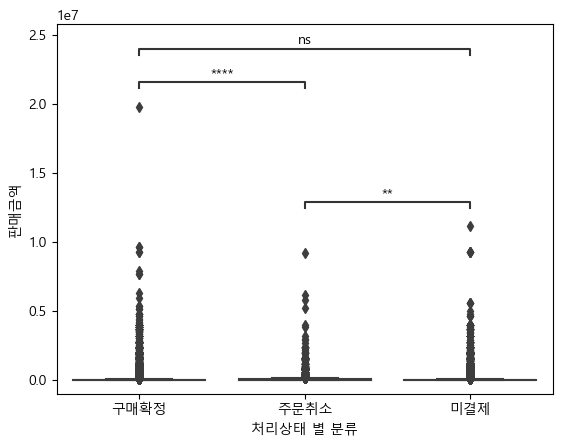

In [59]:
ax = plt.subplot()
ax = sns.boxplot(data=sum_df1, x = '처리상태', y='판매금액')

add_stat_annotation(ax, data=sum_df1, x = '처리상태', y='판매금액', box_pairs=[(('주문취소'), ('미결제')), (('주문취소'), ('구매확정')), (('구매확정'), ('미결제'))],
                   test='t-test_welch', text_format='star', loc='inside', verbose=2)

plt.xlabel('처리상태 별 분류')

In [ ]:
# '구매확정'과 '미결제'는 상관관계가 없으며(ns) 
# '구매확정'과 '주문취소'가 '주문취소', '미결제'보다 상관관계가 높다는 것을 알 수 있었다.
# 하지만 1번 문항인 충성도 분류에 대해서는 유의미하지 않은 데이터라 판단됨.
# 그러므로 처음 df로 돌아가 기준을 다시 세워야 함.

<AxesSubplot:xlabel='처리상태', ylabel='판매금액'>

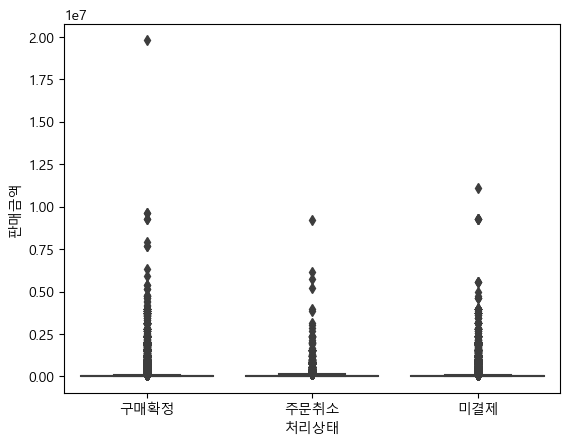

In [76]:
sns.boxplot(data=sum_df1, x='처리상태', y='판매금액')

---
# 2번 문항

In [78]:
df2['주문일자'][1]
# Timestamp 형식

Timestamp('2019-12-16 10:04:50')

In [82]:
df2['주문연월'] = df2['주문일자'].apply(lambda x: x.date().month)
# Timestamp 형식을 date() 함수로 바꾸고 month만 따와서 새로 만든 '주문연월' columns에 넣음.

In [83]:
df2

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,주문연월
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN,12
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,12
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,12
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,12
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN,11
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN,11
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN,11
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN,11


In [84]:
df2['주문연월'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

Text(0, 0.5, '판매금액')

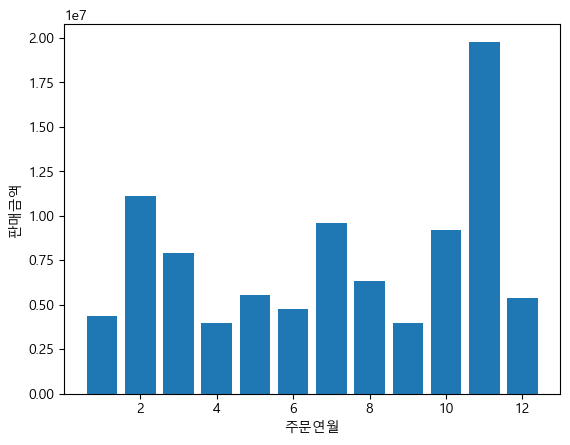

In [85]:
plt.bar(df2['주문연월'], df2['판매금액'])
plt.xlabel('주문연월')
plt.ylabel('판매금액')

In [ ]:
# 11월에 판매금액이 가장 많은 것을 볼 수 있음.

In [87]:
df2 = df2[df2['처리상태'] == '구매확정']
# 월별 실제 수익을 구하기 위해 '처리상태'가 '구매확정'인 것만 선별함.

In [88]:
df2['할부기간'].unique()

array([nan, '12개월', '24개월', '1개월', '6개월', '18개월'], dtype=object)

In [89]:
df2['할부기간'] = df2['할부기간'].apply(lambda x: '0' if x != x else x[:-2])

C:\Users\user\AppData\Local\Temp\ipykernel_23252\3745604026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['할부기간'] = df2['할부기간'].apply(lambda x: '0' if x != x else x[:-2])


In [90]:
df2['할부기간'].unique()
# 일시불을 0으로 처리하고 '개월'을 제거함.

array(['0', '12', '24', '1', '6', '18'], dtype=object)

---
# 3번 문항

In [120]:
df3['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', nan, '신 + 포', '포인트', '신 + 적',
       '신 + 적 + 포', '적 + 포', '웰컴마일', '신 + 웰컴', '적립금', '후 + 포',
       '후 + 적 + 포', '후 + 적', '정 + 적', '정 + 적 + 포', '정기결제', '정 + 포',
       '현금간편결제', '현 + 포', '현 + 적', '현 + 적 + 포', '-', ' + 포'], dtype=object)

In [121]:
df3 = df3.replace(np.nan, 'NAN')

In [127]:
df3 = df3[(df3['결제방법'] != '-') & (df3['결제방법'] != 'NAN')]

In [128]:
df3['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', '신 + 포', '포인트', '신 + 적',
       '신 + 적 + 포', '적 + 포', '웰컴마일', '신 + 웰컴', '적립금', '후 + 포',
       '후 + 적 + 포', '후 + 적', '정 + 적', '정 + 적 + 포', '정기결제', '정 + 포',
       '현금간편결제', '현 + 포', '현 + 적', '현 + 적 + 포', ' + 포'], dtype=object)

In [130]:
df3['결제방법'] = df3['결제방법'].apply(lambda x: '신용카드' if x[0] == '신' else x)
df3['결제방법'] = df3['결제방법'].apply(lambda x: '후불' if x[0] == '후' else x)
df3['결제방법'] = df3['결제방법'].apply(lambda x: '현금간편결제' if x[0] == '현' else x)
df3['결제방법'] = df3['결제방법'].apply(lambda x: '정기결제' if x[0] == '정' else x)
df3['결제방법'] = df3['결제방법'].apply(lambda x: '적립금' if x[0] == '적' else x)
df3['결제방법'] = df3['결제방법'].apply(lambda x: '포인트' if x[0] == ' ' else x)

In [131]:
df3['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', '포인트', '적립금', '웰컴마일', '정기결제',
       '현금간편결제'], dtype=object)

In [132]:
plt.rcParams['font.family'] = 'Malgun Gothic'

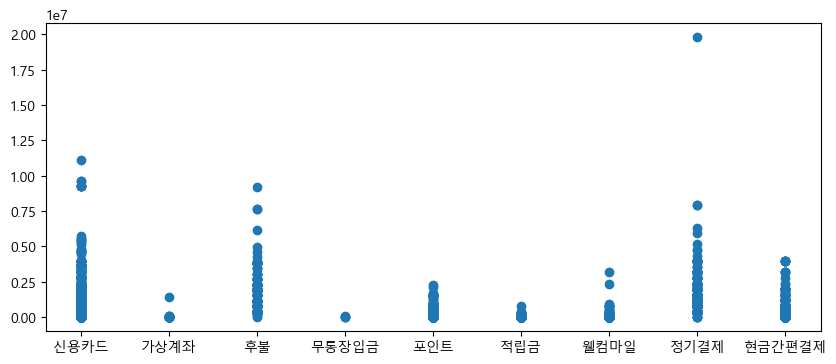

In [133]:
plt.figure(figsize=(10,4))
plt.scatter(df3['결제방법'], df3['판매금액'])
plt.show()

In [ ]:
# 신용카드, 후불, 정기결제가 판매금액이 높고 현금성 수단들은 판매금액이 낮다.